In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from langchain_openai import ChatOpenAI
from langchain_text_splitters import TokenTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [2]:
main_path = "/home/aswath/Projects/deep_learning/backup_brain/test_3/"

### Demonstration of Knowledge Graph Creation

In [5]:
input_path = main_path + "input/tca_chat.txt"

In [6]:
with open(input_path, 'r') as file:
    content = file.read()

text_splitter = TokenTextSplitter(chunk_size=2000, chunk_overlap=100)
texts = text_splitter.split_text(content)

In [37]:
prompt_template = """
-Goal-
Given a chat log from a WhatsApp group involving members of a community (e.g., Tamil Cricket Association), extract all significant entities and relationships related to participants, activities, cultural references, and group dynamics. Also identify recurring themes or clusters of behavior (like jokes, sports events, or content sharing) if applicable.

-Steps-
1. Identify all entities. For each identified entity, extract the following information:
- entity_name: Name or term identifying the person, event, media, place, or cultural item
- entity_type: One of the following types: [participant, event, shared media, place, cultural reference, inside joke, discussion topic, recurring activity, sentiment expression]
- entity_description: A brief but comprehensive description of the entity’s role or relevance in the chat
Format each entity as ("entity" : <entity_name>, <entity_type> : <entity_description>)

2. From the entities identified in step 1, identify all pairs of (source_entity, target_entity) that are *clearly related* to each other.
For each pair of related entities, extract the following information:
- source_entity: name of the source entity, as identified in step 1
- target_entity: name of the target entity, as identified in step 1
- relationship_description: explanation as to why you think the source entity and the target entity are related to each other
- relationship_strength: an integer score between 1 to 10, indicating strength of the relationship between the source entity and target entity
Format each relationship as ("relationship" : <source_entity>, <target_entity>, "relationship description" : <relationship_description>, "relationship strength" : <relationship_strength>)

3. Return output in English as a single list of all the entities and relationships identified in steps 1 and 2. Use **{{record_delimiter}}** as the list delimiter.

4. If you have to translate into English, just translate the descriptions, nothing else!

5. When finished, output {{completion_delimiter}}.

-Examples-
######################
entity_types: [participant, event, shared media, place, cultural reference, inside joke, discussion topic, recurring activity, sentiment expression]
text: {input_text}
######################
output:
"""

In [38]:
llm = ChatOpenAI(temperature=0.0, model="gpt-4o", api_key= "dummy_val")

prompt = ChatPromptTemplate.from_template(prompt_template)
chain = prompt | llm | StrOutputParser()

In [39]:
response = chain.invoke({"input_text": content[:25000]})

In [40]:
print(response)

**Entities:**

1. ("entity": "Adarsh", "participant": "A member of the group who frequently shares media and engages in conversations.")
2. ("entity": "Sushil", "participant": "A member of the group who initiates discussions about cricket and shares media.")
3. ("entity": "Muthu Manimaran", "participant": "A member who shares media and engages in cultural discussions.")
4. ("entity": "Praveen TAMIL Senior", "participant": "A senior member who shares media and engages in cultural and film discussions.")
5. ("entity": "Dinesh Anna IIT Senior", "participant": "A senior member who shares media and engages in discussions.")
6. ("entity": "Tharun ESED Junior", "participant": "A junior member who engages in conversations and shares media.")
7. ("entity": "Gymkhana", "place": "A location mentioned for playing cricket.")
8. ("entity": "Cricket", "recurring activity": "A sport frequently discussed and played by the group members.")
9. ("entity": "Vaathi", "cultural reference": "A Tamil film disc

In [47]:
response_2 = chain.invoke({"input_text": content[-25000:]})

In [48]:
print(response_2)

**("entity" : Dharun Aerospace, "participant" : "A participant in the chat who often engages in humorous exchanges and shares birthday wishes.")**  
**{record_delimiter}**  
**("entity" : Athav IITB Junior, "participant" : "A participant who engages in playful banter and references cultural events like Easter.")**  
**{record_delimiter}**  
**("entity" : Aswath, "participant" : "A participant who is often involved in humorous exchanges and shares media content.")**  
**{record_delimiter}**  
**("entity" : Tharun ESED Junior, "participant" : "A participant who frequently engages in jokes and playful banter, often using emojis.")**  
**{record_delimiter}**  
**("entity" : Adarsh, "participant" : "A participant who shares media content and engages in discussions about cricket and other topics.")**  
**{record_delimiter}**  
**("entity" : Muthu Manimaran, "participant" : "A participant who shares media content and engages in humorous exchanges.")**  
**{record_delimiter}**  
**("entity" : 

### Analysing Created Knowledge Graph

In [16]:
entities_path = main_path + "output/entities.parquet"
communities_path = main_path + "output/communities.parquet"
# community_reports_path = main_path + "output/community_reports.parquet"
documents_path = main_path + "output/documents.parquet"
relationships_path = "output/relationships.parquet"

entity_df = pd.read_parquet(entities_path)
community_df = pd.read_parquet(communities_path)
# community_report_df = pd.read_parquet(community_reports_path)
documents_df = pd.read_parquet(documents_path)
relationships_df = pd.read_parquet(relationships_path)

### Entity

In [17]:
entity_df.head()

,id,human_readable_id,title,type,description,text_unit_ids,frequency,degree,x,y
0,0fd18e16-a98a-4745-8deb-3aef8555b714,0,AJITH KUMAR,PERSON,Ajith Kumar is a Tamil actor who was reportedl...,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...,1,3,0,0
1,b16b70ce-8656-4286-88e6-74f3a8753bdb,1,CHENNAI AIRPORT,GEO,Location where Tamil actor Ajith Kumar was mob...,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...,1,1,0,0
2,2c7e31b4-64c6-46b6-a559-f43ef7d54d5a,2,ADARSH,PERSON,"A participant in the conversation, commenting ...",[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...,1,1,0,0
3,40c978b2-9fc8-4155-bc7f-35b97a157b4b,3,THARUN ESED JUNIOR,PERSON,"A participant in the conversation, expressing ...",[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...,1,1,0,0
4,a221ace7-baca-4b13-89c3-902202bd0ca4,4,MUTHU MANIMARAN,,,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...,1,2,0,0


In [23]:
for i in range(entity_df.shape[0]):
    print(f"\n\nEntity : {entity_df.iloc[i]["title"]}    Type : {entity_df.iloc[i]["type"]}")
    print(f"Description : {entity_df.iloc[i]["description"]}")



Entity : AJITH KUMAR    Type : PERSON
Description : Ajith Kumar is a Tamil actor who was reportedly mobbed at Chennai airport and hospitalized after suffering a leg injury


Entity : CHENNAI AIRPORT    Type : GEO
Description : Location where Tamil actor Ajith Kumar was mobbed leading to his hospitalization


Entity : ADARSH    Type : PERSON
Description : A participant in the conversation, commenting on Ajith Kumar's situation and sharing media


Entity : THARUN ESED JUNIOR    Type : PERSON
Description : A participant in the conversation, expressing opinions and stating language preferences


Entity : MUTHU MANIMARAN    Type : 
Description : 


Entity : FACEBOOK    Type : ORGANIZATION
Description : Facebook is a social media platform where the URL is directing to, indicating an activity or event mentioned in the text


Entity : ASWATH    Type : 
Description : 


### Relationships

In [24]:
relationships_df.head()

,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,2d9d656a-6992-497b-a67d-2582241ec4f9,0,AJITH KUMAR,CHENNAI AIRPORT,"Ajith Kumar was mobbed at Chennai Airport, lea...",1.0,4,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...
1,2465d006-cf5b-4146-bfa8-0103200cd545,1,AJITH KUMAR,MUTHU MANIMARAN,Muthu Manimaran shared news about Ajith Kumar'...,7.0,5,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...
2,56ac9ecc-56b2-44e7-b17d-4001ab7a0e66,2,AJITH KUMAR,ADARSH,Adarsh commented on Ajith Kumar's vulnerabilit...,5.0,4,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...
3,a6ff5f36-ebf4-42a4-81d0-0a6808b40996,3,THARUN ESED JUNIOR,MUTHU MANIMARAN,Tharun ESED Junior responds to Muthu Manimaran...,1.0,3,[8d53c3ffba9a7f60d181c6057ec4d81d44b6d1268f486...
4,deac39d6-fea5-46f8-ad57-674de9cf1af6,4,FACEBOOK,ASWATH,Aswath is potentially linked to an activity or...,1.0,2,[0b81dd19d118480eb5e7b3404fe51e8c39e730a73ead6...


In [25]:
for i in range(relationships_df.shape[0]):
    print(f"\n\nSource : {relationships_df.iloc[i]["source"]}    Target : {relationships_df.iloc[i]["target"]}    Weight : {relationships_df.iloc[i]["weight"]}")
    print(f"Description : {relationships_df.iloc[i]["description"]}")



Source : AJITH KUMAR    Target : CHENNAI AIRPORT    Weight : 1.0
Description : Ajith Kumar was mobbed at Chennai Airport, leading to his hospitalization


Source : AJITH KUMAR    Target : MUTHU MANIMARAN    Weight : 7.0
Description : Muthu Manimaran shared news about Ajith Kumar's incident at Chennai Airport


Source : AJITH KUMAR    Target : ADARSH    Weight : 5.0
Description : Adarsh commented on Ajith Kumar's vulnerability, referring to him metaphorically


Source : THARUN ESED JUNIOR    Target : MUTHU MANIMARAN    Weight : 1.0
Description : Tharun ESED Junior responds to Muthu Manimaran's messages in the conversation


Source : FACEBOOK    Target : ASWATH    Weight : 1.0
Description : Aswath is potentially linked to an activity or event mentioned on a Facebook page, suggesting a connection or interest in the content shared on the platform


### Communities

In [26]:
community_report_df.head()

NameError: name 'community_report_df' is not defined

In [77]:
for i in range(community_report_df.shape[0]):
    print(f"\n\nTitle : {community_report_df.iloc[i]["title"]}   Rank : {community_report_df.iloc[i]["rank"]}")
    print(f"Rating Explanation : {community_report_df.iloc[i]["rating_explanation"]}")
    print(f"\nSummary : {community_report_df.iloc[i]["summary"]}")



Title : Berkshire Hathaway and Warren Buffett's Investment Network   Rank : 9.5
Rating Explanation : The impact severity rating is high due to Berkshire Hathaway's significant influence in the global financial markets and its strategic investments across various industries.

Summary : The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.


Title : MidAmerican Energy and Walter Scott   Rank : 6.5
Rating Explanation : The impact severity rating is moderately high due to the involvement of high-profile ind

### Community

In [27]:
community_report_df.iloc[0]

NameError: name 'community_report_df' is not defined

In [89]:
print(f"Title : {community_report_df.iloc[0]["title"]}")
print(f"\nSummary : {community_report_df.iloc[0]["summary"]}")

Title : Berkshire Hathaway and Warren Buffett's Investment Network

Summary : The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.


In [90]:
print(community_report_df.iloc[0]["full_content"])

# Berkshire Hathaway and Warren Buffett's Investment Network

The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.

## Warren Buffett's Strategic Leadership

Warren Buffett, as the chairman and CEO of Berkshire Hathaway, is a central figure in this community. His leadership and investment strategies have been instrumental in shaping the company's direction and success. Buffett's ability to identify and capitalize on investment opportunities, particularly during financial crises, has earned him the nickna

#### Summary under consideration
Diversification through Transportation: Burlington Northern Santa Fe

The acquisition of Burlington Northern Santa Fe in 2010 represents Berkshire Hathaway's strategic diversification into the transportation sector. As the largest railroad in the United States, this acquisition has strengthened the conglomerate's presence in the transportation industry and provided a stable revenue stream [Data: Entities (57); Relationships (55)]. This move aligns with Buffett's strategy of investing in essential infrastructure that supports economic growth.

In [28]:
idx = 57
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

IndexError: single positional indexer is out-of-bounds

In [99]:
idx = 55
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : WARREN BUFFETT    Target : BURLINGTON NORTHERN SANTA FE    Weight : 9.0
Description : Warren Buffett acquired Burlington Northern Santa Fe in 2010


#### Summary under consideration

Significant Acquisitions: GEICO and General Re

GEICO and General Re are two significant acquisitions by Berkshire Hathaway that highlight its strategic focus on the insurance sector. GEICO, acquired in 1996, has become a major contributor to the conglomerate's portfolio, reflecting its importance and value [Data: Entities (35); Relationships (48)]. General Re, acquired in 1998 for $22 billion, marked the largest transaction in Berkshire Hathaway's history, underscoring the company's commitment to expanding its insurance operations [Data: Entities (45); Relationships (49)].

In [102]:
idx = 45
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

Entity : GENERAL RE    Type : ORGANIZATION
Description : General Re is a prominent reinsurer that was acquired by Berkshire Hathaway in 1998. This acquisition was a significant milestone, as it marked the largest transaction in Berkshire Hathaway's history, with a deal valued at $22 billion.


In [103]:
idx = 49
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : WARREN BUFFETT    Target : GENERAL RE    Weight : 8.0
Description : Warren Buffett acquired General Re in 1998 for $22 billion


### Visualize Graph

In [29]:
G = nx.DiGraph()

In [30]:
for _, row in entity_df.iterrows():
    G.add_node(row['title'], type=row['type'], description=row['description'])

In [31]:
for _, row in relationships_df.iterrows():
    G.add_edge(row['source'], row['target'], description=row['description'], strength=row['weight'])

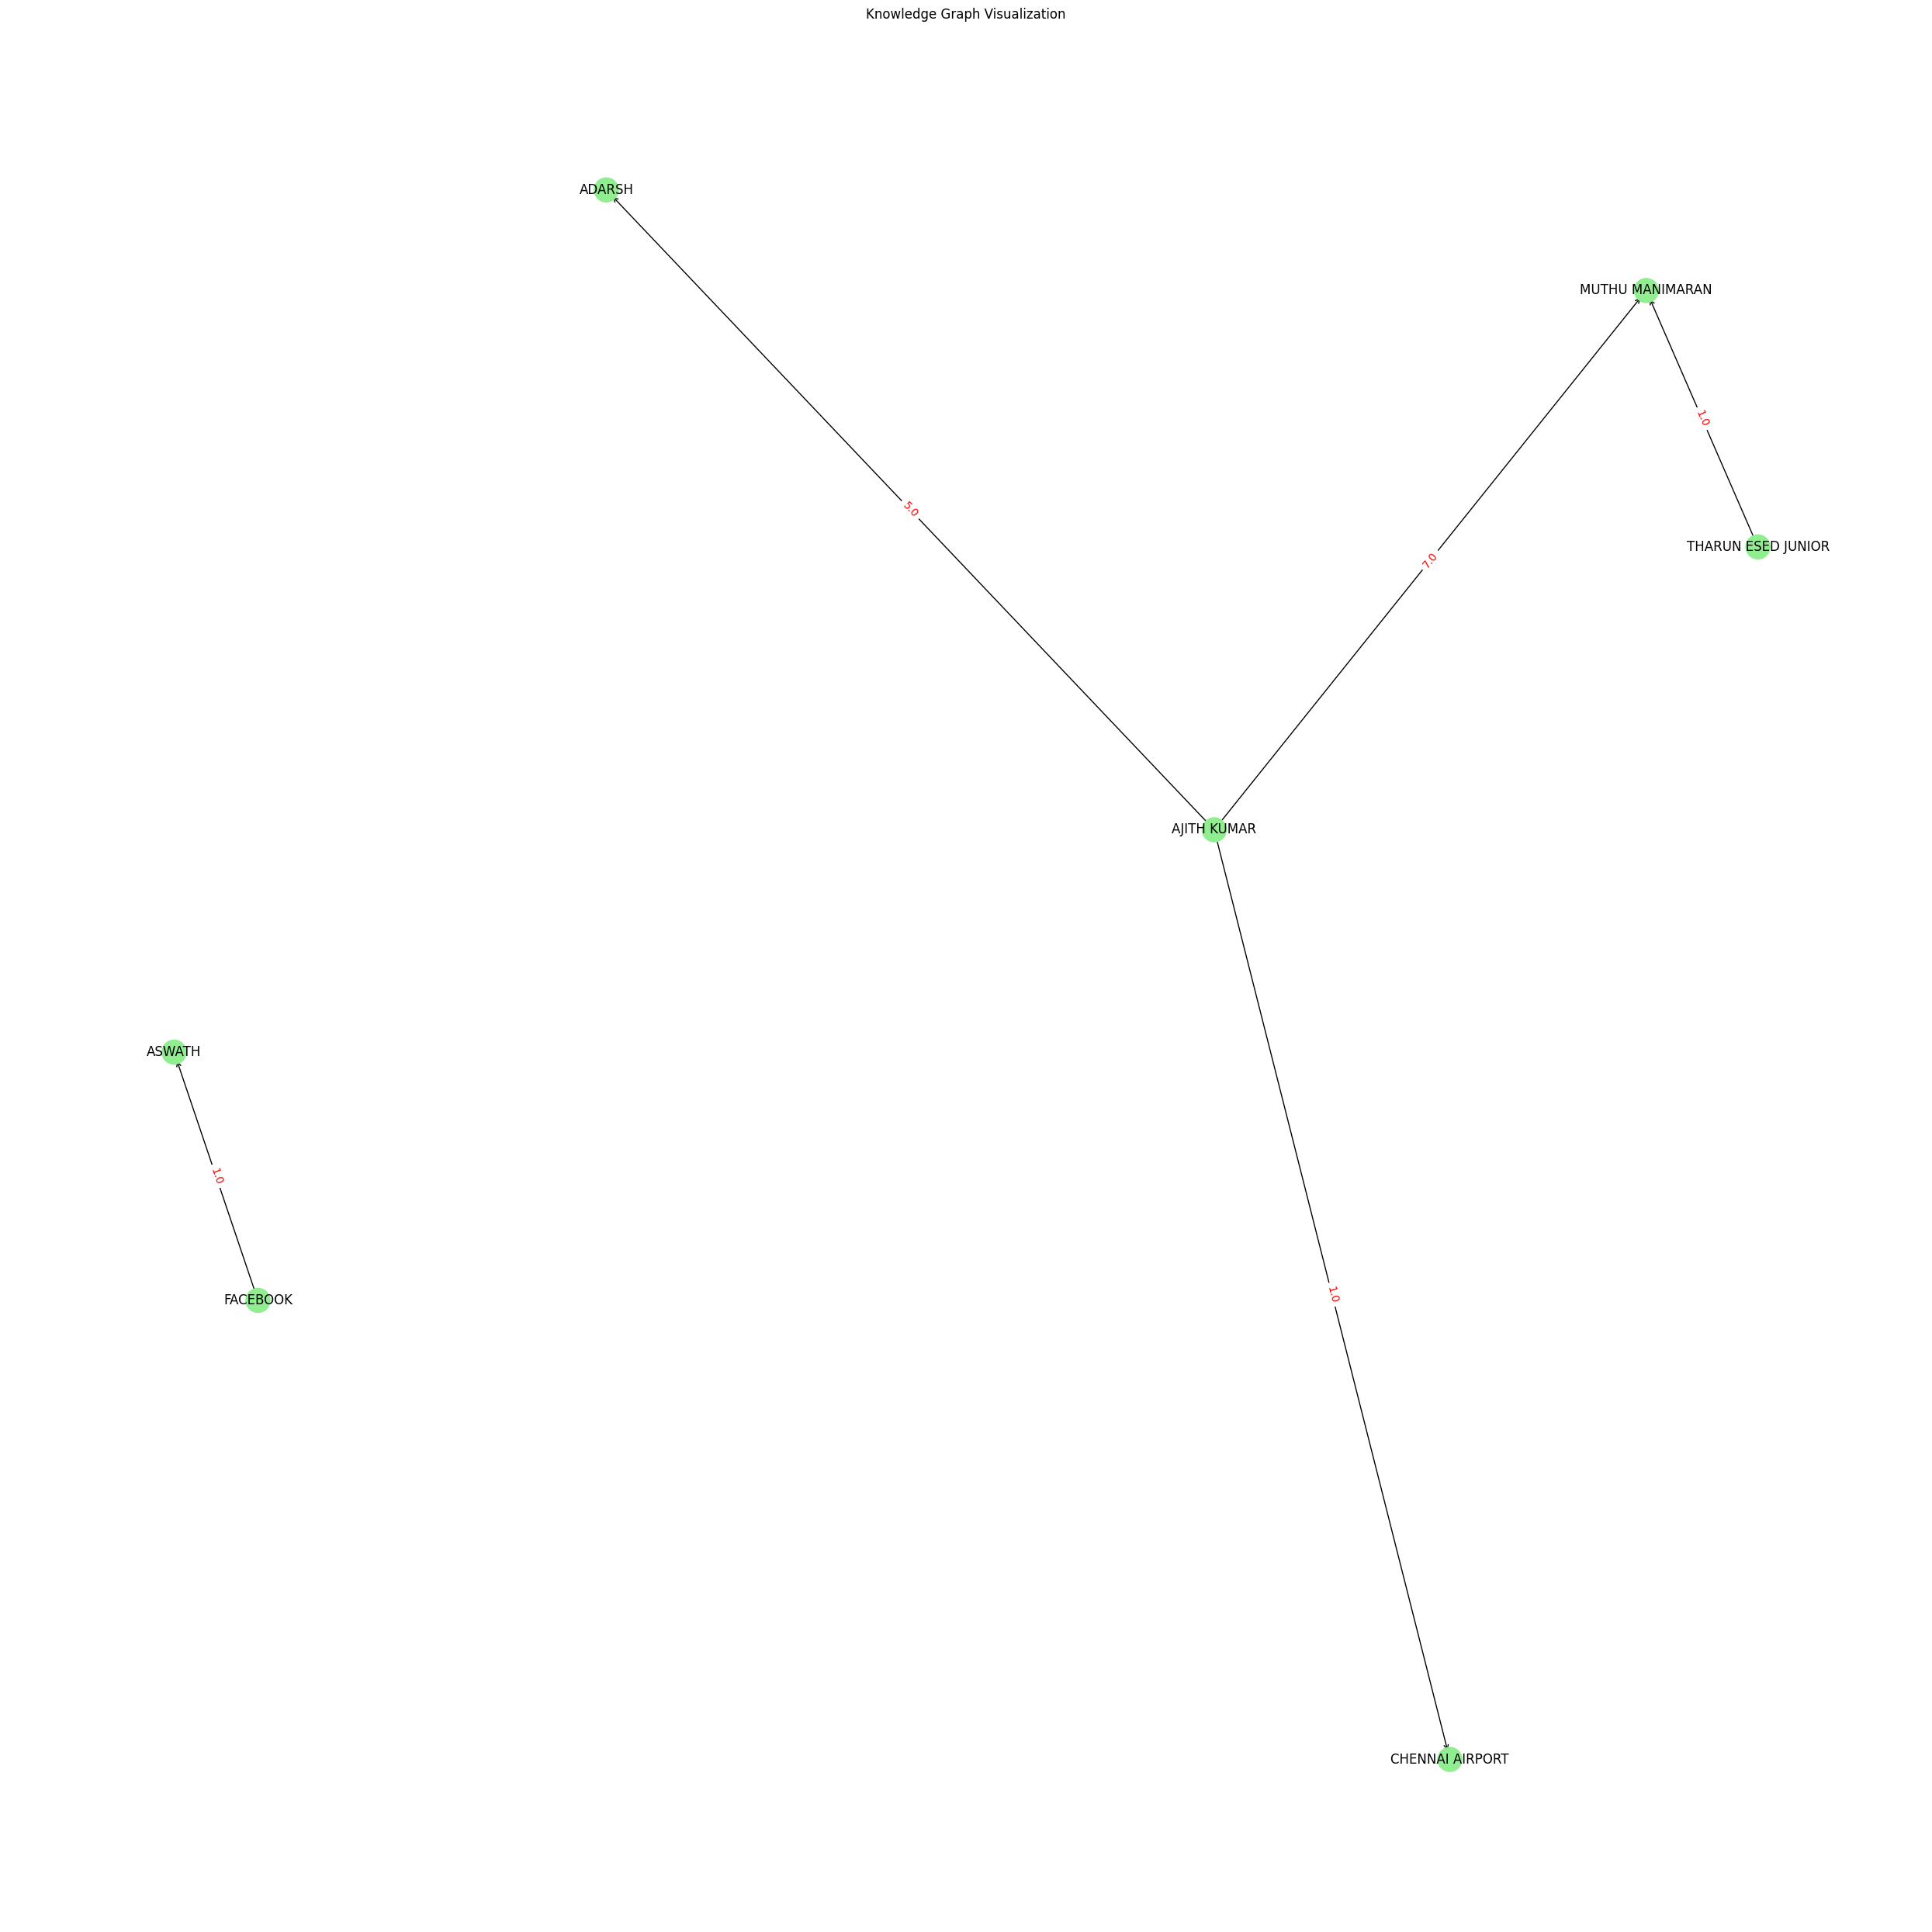

In [32]:
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, k=0.5)

node_colors = ['lightblue' if G.nodes[n]['type'] == 'user' else 'lightgreen' for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)

nx.draw_networkx_labels(G, pos, font_size=12)

edge_labels = {(u, v): d['strength'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Knowledge Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()